In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('clean_df.csv')

# Building stationary varibales


In [2]:
#build dummy varibale
df1['label'] = pd.cut(x=df1['tomorrow change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
df1['Dummy_label'] = df1['label'].map({'Decrease': 0, 'Increase': 1})
df1['Treasury'] = df1['10Y Treasury']
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]

In [25]:
    timeseries = df1['Dummy_label'].dropna()
    result = adfuller(timeseries)
    result
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])

ADF Statistic: -21.762837
p-value: 0.000000


In [3]:
dfDOGE = df1.loc['DOGE_74']
dfDOGE.set_index(['time_close'],inplace=True)
dfDOGE['Dummy_label'] = dfDOGE['Dummy_label'].astype(float)
dfDOGE.drop('label', axis=1, inplace=True)
dfDOGE.drop('10Y_Treasury', axis=1, inplace=True)
result=dfDOGE.dtypes
dfDOGE

/tmp/ipykernel_2005/2976369268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE['Dummy_label'] = dfDOGE['Dummy_label'].astype(float)
/tmp/ipykernel_2005/2976369268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/2976369268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE.drop('10Y_Treasury', ax

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury
time_close,,,,,,,,,,,,,,,,,
2020-09-24,0.002575,8.478099e+07,3.254117e+08,9,24,3,1,-0.025248,-0.153101,0.021075,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666
2020-09-25,0.002629,1.120052e+08,3.323058e+08,9,25,4,1,0.021075,0.321112,0.027243,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-26,0.002701,1.237417e+08,3.413966e+08,9,26,5,0,0.027243,0.104786,0.007860,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-27,0.002722,1.060252e+08,3.441176e+08,9,27,6,0,0.007860,-0.143173,0.005012,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-28,0.002736,7.818546e+07,3.458797e+08,9,28,0,1,0.005012,-0.262577,-0.022978,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.060484,2.764186e+08,8.024411e+09,9,29,3,1,-0.003809,-0.174360,0.002384,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747
2022-09-30,0.060628,2.334081e+08,8.043540e+09,9,30,4,1,0.002384,-0.155599,0.028931,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804
2022-10-01,0.062382,4.007635e+08,8.276249e+09,10,1,5,0,0.028931,0.717008,-0.027036,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804


In [4]:
dfXMR = df1.loc['XMR_328']
dfXMR.set_index(['time_close'],inplace=True)
dfXMR['Dummy_label'] = dfXMR['Dummy_label'].astype(float)
dfXMR.drop('label', axis=1, inplace=True)
dfXMR.drop('10Y_Treasury', axis=1, inplace=True)
dfXMR['XMR_close'] = dfXMR['close']
dfXMR.drop('close', axis=1, inplace=True)
result=dfXMR.dtypes
dfXMR

/tmp/ipykernel_2005/2868142663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXMR['Dummy_label'] = dfXMR['Dummy_label'].astype(float)
/tmp/ipykernel_2005/2868142663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXMR.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/2868142663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXMR.drop('10Y_Treasury', axis=1

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XMR_close
time_close,,,,,,,,,,,,,,,,,
2020-09-24,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,88.404357
2020-09-25,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,91.695987
2020-09-26,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,93.026053
2020-09-27,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,95.044383
2020-09-28,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,97.741001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,146.795038
2022-09-30,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,148.238784
2022-10-01,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,147.036460


In [5]:
dfXLM = df1.loc['XLM_512']
dfXLM.set_index(['time_close'],inplace=True)
dfXLM['Dummy_label'] = dfXLM['Dummy_label'].astype(float)
dfXLM.drop('label', axis=1, inplace=True)
dfXLM.drop('10Y_Treasury', axis=1, inplace=True)
dfXLM['XLM_close'] = dfXLM['close']
dfXLM.drop('close', axis=1, inplace=True)
result=dfXLM.dtypes
dfXLM

/tmp/ipykernel_2005/3533716497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXLM['Dummy_label'] = dfXLM['Dummy_label'].astype(float)
/tmp/ipykernel_2005/3533716497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXLM.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/3533716497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXLM.drop('10Y_Treasury', axis=1

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XLM_close
time_close,,,,,,,,,,,,,,,,,
2020-09-24,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,0.130112,0.023188,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,0.068613
2020-09-25,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,0.153256,0.066801,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,0.070204
2020-09-26,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,0.211185,-0.010805,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.074894
2020-09-27,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,-0.295592,-0.000851,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.074085
2020-09-28,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,-0.005278,-0.003863,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.074022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,-0.060907,0.053767,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,0.108473
2022-09-30,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,0.420765,0.001370,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804,0.114305
2022-10-01,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,-0.147152,0.058336,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804,0.114461


In [6]:
dfXRP = df1.loc['XRP_52']
dfXRP.set_index(['time_close'],inplace=True)
dfXRP['Dummy_label'] = dfXRP['Dummy_label'].astype(float)
dfXRP.drop('label', axis=1, inplace=True)
dfXRP.drop('10Y_Treasury', axis=1, inplace=True)
dfXRP['XRP_close'] = dfXRP['close']
dfXRP.drop('close', axis=1, inplace=True)
result=dfXRP.dtypes
dfXRP

/tmp/ipykernel_2005/3787751825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXRP['Dummy_label'] = dfXRP['Dummy_label'].astype(float)
/tmp/ipykernel_2005/3787751825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXRP.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/3787751825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXRP.drop('10Y_Treasury', axis=1

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XRP_close
time_close,,,,,,,,,,,,,,,,,
2020-09-24,1.676911e+09,1.005329e+10,9,24,3,1,-0.045198,-0.050177,0.040102,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,0.222924
2020-09-25,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,0.231864
2020-09-26,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.243233
2020-09-27,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,0.243122
2020-09-28,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.244379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,0.447573
2022-09-30,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.480514
2022-10-01,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.475265


In [7]:
dfBTC = df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC['Dummy_label'] = dfBTC['Dummy_label'].astype(float)
dfBTC.drop('label', axis=1, inplace=True)
dfBTC.drop('10Y_Treasury', axis=1, inplace=True)
dfBTC['BTC_close'] = dfBTC['close']
dfBTC.drop('close', axis=1, inplace=True)
result=dfBTC.dtypes
dfBTC

/tmp/ipykernel_2005/3449753986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC['Dummy_label'] = dfBTC['Dummy_label'].astype(float)
/tmp/ipykernel_2005/3449753986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/3449753986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.drop('10Y_Treasury', axis=1

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,BTC_close
time_close,,,,,,,,,,,,,,,,,
2020-09-24,2.422745e+10,1.904390e+11,9,24,3,1,-0.021312,0.018214,0.046477,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,10295.054804
2020-09-25,4.394135e+10,1.992993e+11,9,25,4,1,0.046477,0.813701,-0.009782,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,10773.534000
2020-09-26,3.927767e+10,1.973608e+11,9,26,5,0,-0.009782,-0.106134,0.009511,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,10668.141934
2020-09-27,4.710672e+10,1.992481e+11,9,27,6,0,0.009511,0.199326,0.010435,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,10769.604523
2020-09-28,5.502327e+10,2.013376e+11,9,28,0,1,0.010435,0.168056,-0.014901,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,10881.984006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,5.264416e+10,3.726338e+11,9,29,3,1,0.017353,-0.094970,0.004500,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,19445.124438
2022-09-30,4.161615e+10,3.743283e+11,9,30,4,1,0.004500,-0.209482,-0.006790,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,19532.627889
2022-10-01,4.274283e+10,3.718069e+11,10,1,5,0,-0.006790,0.027073,-0.005695,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,19400.000434


In [8]:
dfETH = df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH['Dummy_label'] = dfETH['Dummy_label'].astype(float)
dfETH.drop('label', axis=1, inplace=True)
dfETH.drop('10Y_Treasury', axis=1, inplace=True)
dfETH['ETH_close'] = dfETH['close']
dfETH.drop('close', axis=1, inplace=True)
result=dfETH.dtypes
dfETH

/tmp/ipykernel_2005/2590312222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH['Dummy_label'] = dfETH['Dummy_label'].astype(float)
/tmp/ipykernel_2005/2590312222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.drop('label', axis=1, inplace=True)
/tmp/ipykernel_2005/2590312222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.drop('10Y_Treasury', axis=1

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,ETH_close
time_close,,,,,,,,,,,,,,,,,
2020-09-24,1.406652e+10,3.638855e+10,9,24,3,1,-0.059389,-0.001510,0.078154,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,322.801017
2020-09-25,1.531143e+10,3.923720e+10,9,25,4,1,0.078154,0.088501,0.010122,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,348.029329
2020-09-26,1.362715e+10,3.963910e+10,9,26,5,0,0.010122,-0.110002,0.021704,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,351.552190
2020-09-27,1.245056e+10,4.050423e+10,9,27,6,0,0.021704,-0.086342,-0.002503,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,359.182175
2020-09-28,1.363118e+10,4.040762e+10,9,28,0,1,-0.002503,0.094825,-0.008407,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,358.283277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,1.884855e+10,1.635036e+11,9,29,3,1,0.000887,0.064061,0.002108,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1333.964086
2022-09-30,1.412469e+10,1.638675e+11,9,30,4,1,0.002108,-0.250622,-0.006693,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,1336.776474
2022-10-01,1.365689e+10,1.627897e+11,10,1,5,0,-0.006693,-0.033120,-0.012576,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,1327.829013


In [9]:
dfcoin = pd. concat([dfDOGE, dfXMR['XMR_close'], dfXLM['XLM_close'], dfXRP['XRP_close'], dfBTC['BTC_close'], dfETH['ETH_close']], axis = 1)

In [10]:
dfcoin

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,Gold,Oil,EUR_USD,Dummy_label,Treasury,XMR_close,XLM_close,XRP_close,BTC_close,ETH_close
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.002575,8.478099e+07,3.254117e+08,9,24,3,1,-0.025248,-0.153101,0.021075,...,1868.300049,40.310001,1.165854,1.0,0.666,88.404357,0.068613,0.222924,10295.054804,322.801017
2020-09-25,0.002629,1.120052e+08,3.323058e+08,9,25,4,1,0.021075,0.321112,0.027243,...,1857.699951,40.250000,1.167324,1.0,0.659,91.695987,0.070204,0.231864,10773.534000,348.029329
2020-09-26,0.002701,1.237417e+08,3.413966e+08,9,26,5,0,0.027243,0.104786,0.007860,...,1857.699951,40.250000,1.167324,1.0,0.659,93.026053,0.074894,0.243233,10668.141934,351.552190
2020-09-27,0.002722,1.060252e+08,3.441176e+08,9,27,6,0,0.007860,-0.143173,0.005012,...,1857.699951,40.250000,1.167324,1.0,0.659,95.044383,0.074085,0.243122,10769.604523,359.182175
2020-09-28,0.002736,7.818546e+07,3.458797e+08,9,28,0,1,0.005012,-0.262577,-0.022978,...,1872.800049,40.599998,1.163535,0.0,0.663,97.741001,0.074022,0.244379,10881.984006,358.283277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.060484,2.764186e+08,8.024411e+09,9,29,3,1,-0.003809,-0.174360,0.002384,...,1658.500000,81.230003,0.970817,1.0,3.747,146.795038,0.108473,0.447573,19445.124438,1333.964086
2022-09-30,0.060628,2.334081e+08,8.043540e+09,9,30,4,1,0.002384,-0.155599,0.028931,...,1662.400024,79.489998,0.982956,1.0,3.804,148.238784,0.114305,0.480514,19532.627889,1336.776474
2022-10-01,0.062382,4.007635e+08,8.276249e+09,10,1,5,0,0.028931,0.717008,-0.027036,...,1662.400024,79.489998,0.982956,0.0,3.804,147.036460,0.114461,0.475265,19400.000434,1327.829013


In [11]:
dfcoin=dfcoin[['close','volume','SPY', 'VIX', 'Treasury', 'Gold', 'Oil', 'EUR_USD','XMR_close','XLM_close', 'XRP_close', 'BTC_close', 'ETH_close']].pct_change()

In [12]:
dfcoin

,close,volume,SPY,VIX,Treasury,Gold,Oil,EUR_USD,XMR_close,XLM_close,XRP_close,BTC_close,ETH_close
time_close,,,,,,,,,,,,,
2020-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,0.021075,0.321112,0.016167,-0.074711,-0.010511,-0.005674,-0.001488,0.001261,0.037234,0.023188,0.040102,0.046477,0.078154
2020-09-26,0.027243,0.104786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014505,0.066801,0.049036,-0.009782,0.010122
2020-09-27,0.007860,-0.143173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021696,-0.010805,-0.000456,0.009511,0.021704
2020-09-28,0.005012,-0.262577,0.016609,-0.007202,0.006070,0.008128,0.008696,-0.003246,0.028372,-0.000851,0.005170,0.010435,-0.002503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,-0.003809,-0.174360,-0.020889,0.055003,0.011336,-0.001144,-0.011199,0.011669,0.012601,-0.014612,0.004518,0.017353,0.000887
2022-09-30,0.002384,-0.155599,-0.015464,-0.006910,0.015212,0.002352,-0.021421,0.012503,0.009835,0.053767,0.073597,0.004500,0.002108
2022-10-01,0.028931,0.717008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008111,0.001370,-0.010923,-0.006790,-0.006693


In [13]:
dfcoin.drop(dfcoin.head(1).index, inplace=True) 


In [14]:
dfcoin

,close,volume,SPY,VIX,Treasury,Gold,Oil,EUR_USD,XMR_close,XLM_close,XRP_close,BTC_close,ETH_close
time_close,,,,,,,,,,,,,
2020-09-25,0.021075,0.321112,0.016167,-0.074711,-0.010511,-0.005674,-0.001488,0.001261,0.037234,0.023188,0.040102,0.046477,0.078154
2020-09-26,0.027243,0.104786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014505,0.066801,0.049036,-0.009782,0.010122
2020-09-27,0.007860,-0.143173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021696,-0.010805,-0.000456,0.009511,0.021704
2020-09-28,0.005012,-0.262577,0.016609,-0.007202,0.006070,0.008128,0.008696,-0.003246,0.028372,-0.000851,0.005170,0.010435,-0.002503
2020-09-29,-0.022978,0.318528,-0.005446,0.003055,-0.027149,0.011480,-0.032266,0.003737,-0.025720,-0.003863,-0.007553,-0.014901,-0.008407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,-0.003809,-0.174360,-0.020889,0.055003,0.011336,-0.001144,-0.011199,0.011669,0.012601,-0.014612,0.004518,0.017353,0.000887
2022-09-30,0.002384,-0.155599,-0.015464,-0.006910,0.015212,0.002352,-0.021421,0.012503,0.009835,0.053767,0.073597,0.004500,0.002108
2022-10-01,0.028931,0.717008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008111,0.001370,-0.010923,-0.006790,-0.006693


array([<AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>], dtype=object)

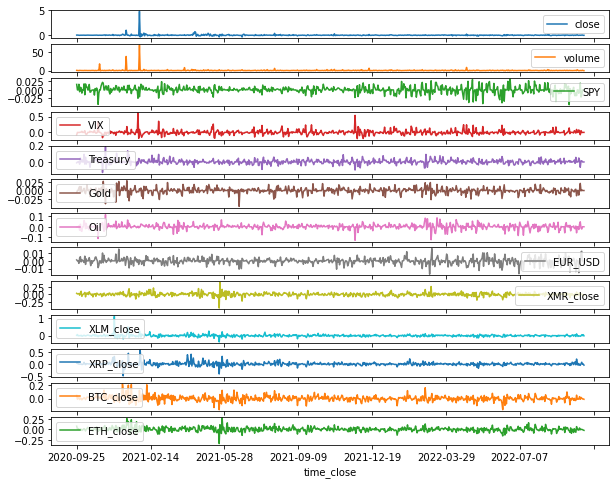

In [15]:
dfcoin.plot(subplots=True,figsize=(10,8))

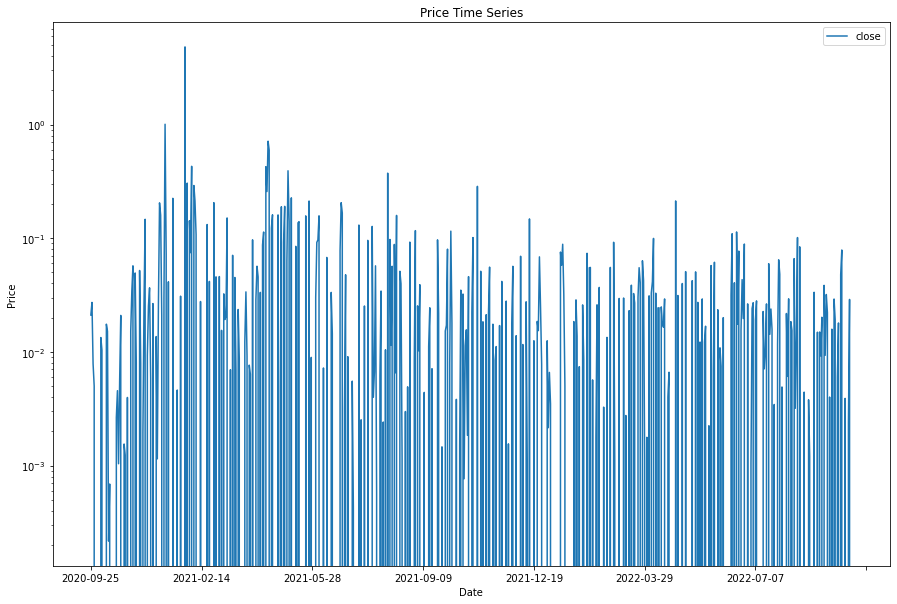

In [18]:
dfcoin.plot(y=['close'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Time Series')
plt.show()

ADF Statistic: -18.009019
p-value: 0.000000


ADF Statistic: -4.335093
p-value: 0.000386


ADF Statistic: -11.975985
p-value: 0.000000


ADF Statistic: -8.482844
p-value: 0.000000


ADF Statistic: -5.051954
p-value: 0.000017


ADF Statistic: -28.346370
p-value: 0.000000


ADF Statistic: -16.748606
p-value: 0.000000


ADF Statistic: -25.852504
p-value: 0.000000


ADF Statistic: -8.496738
p-value: 0.000000


ADF Statistic: -4.829801
p-value: 0.000048


ADF Statistic: -14.207842
p-value: 0.000000


ADF Statistic: -7.252082
p-value: 0.000000


ADF Statistic: -13.916134
p-value: 0.000000




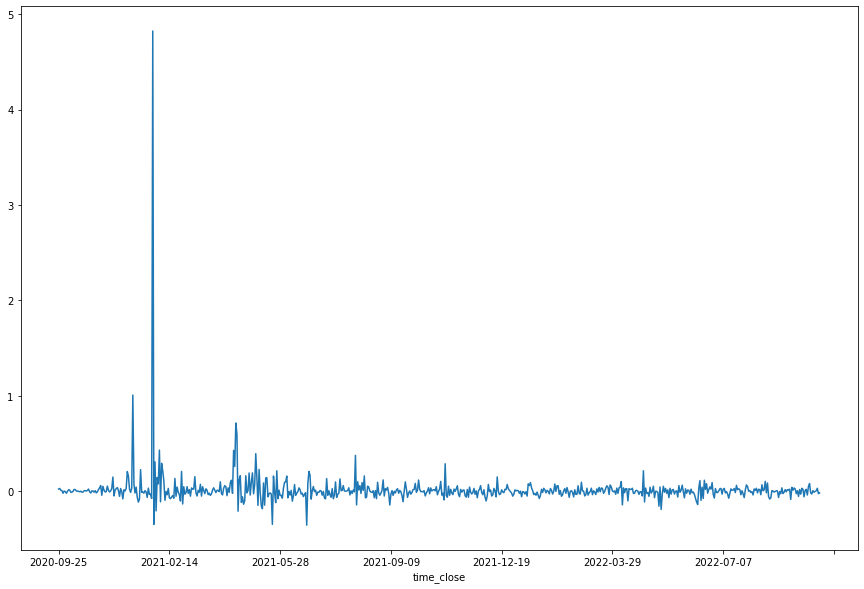

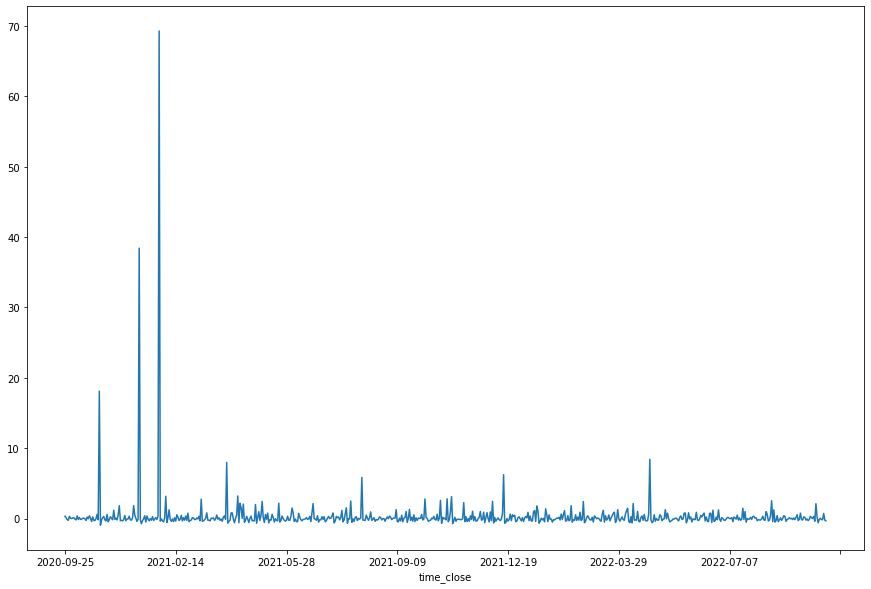

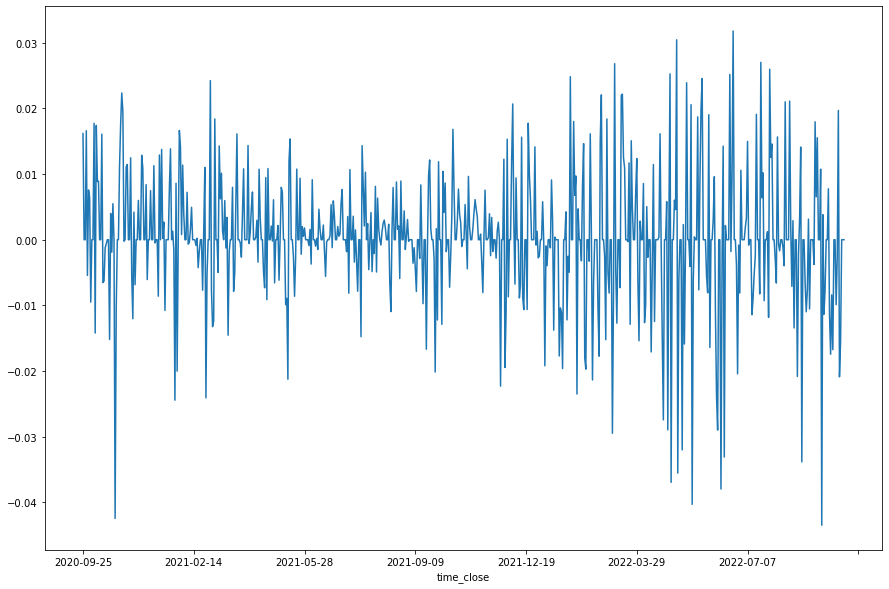

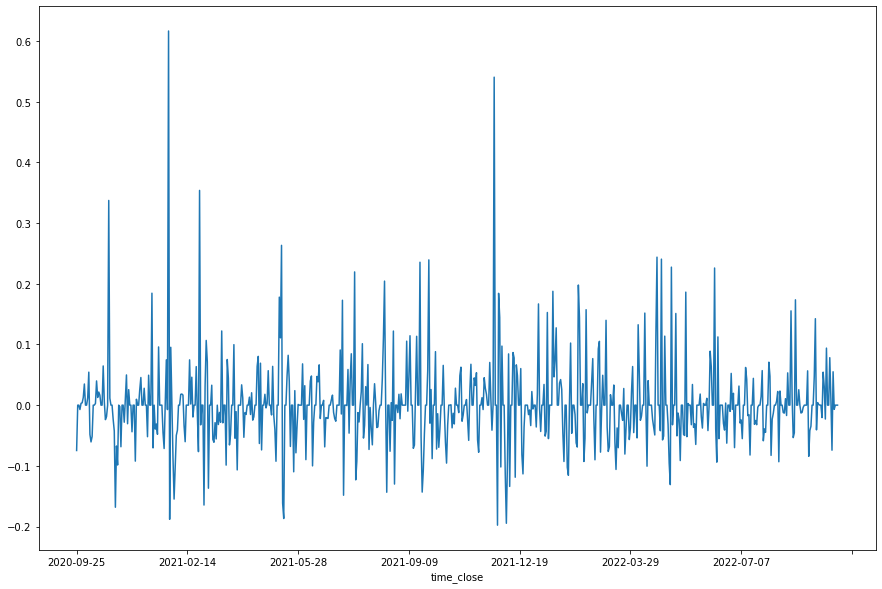

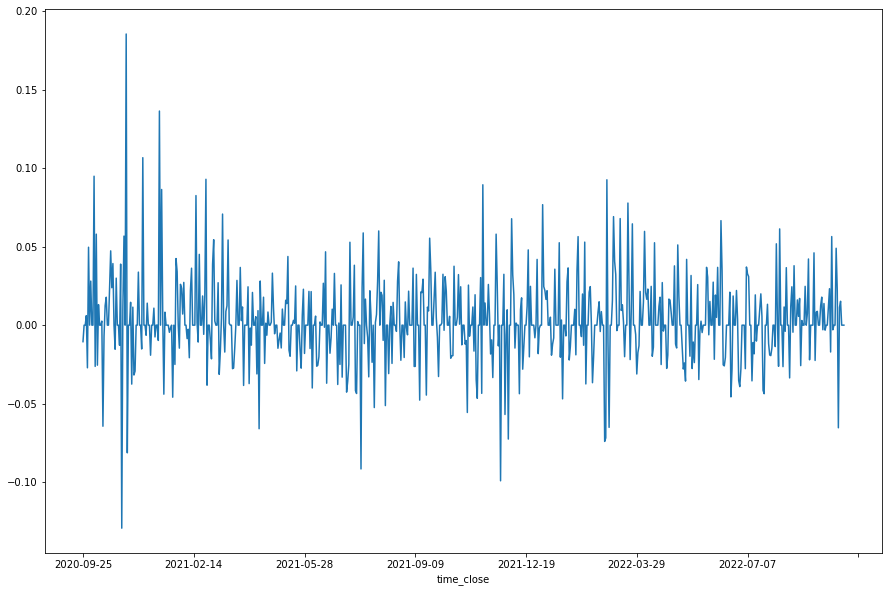

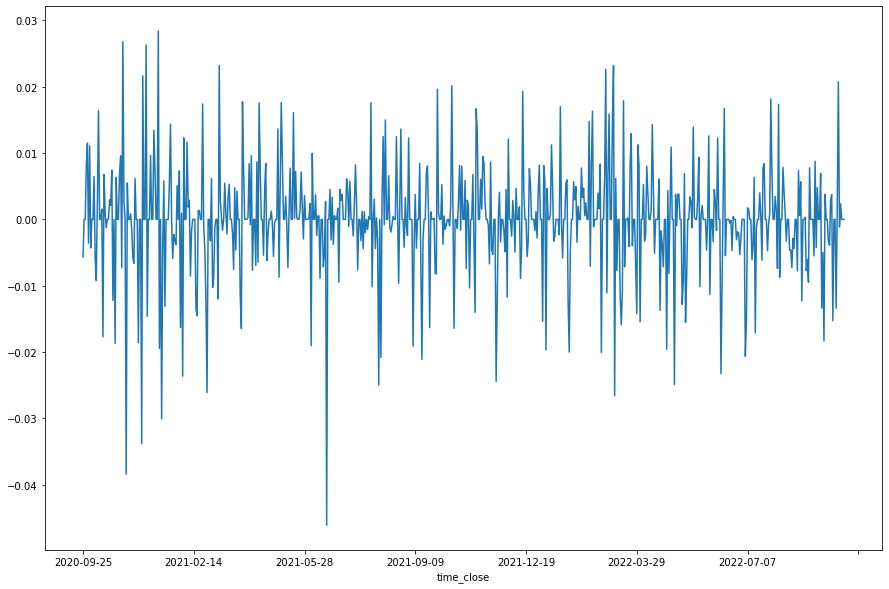

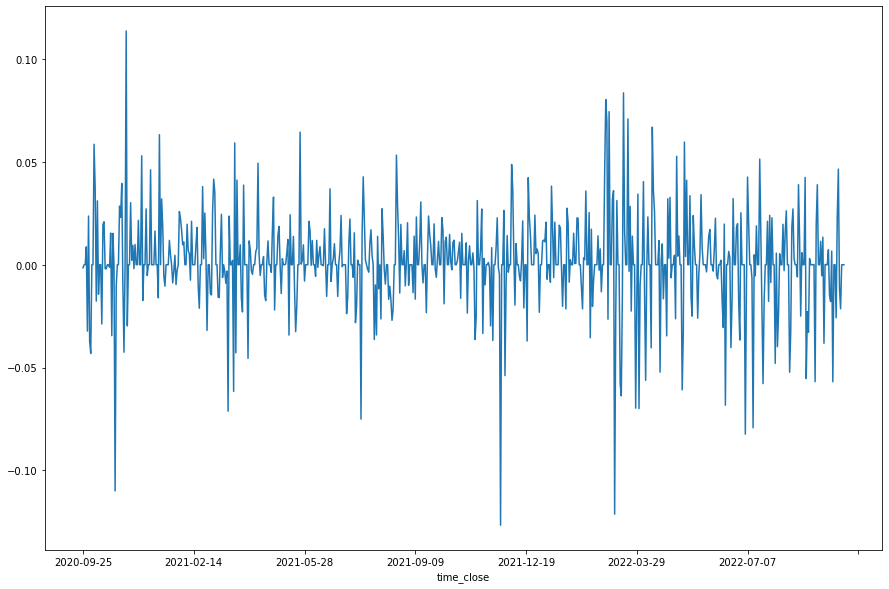

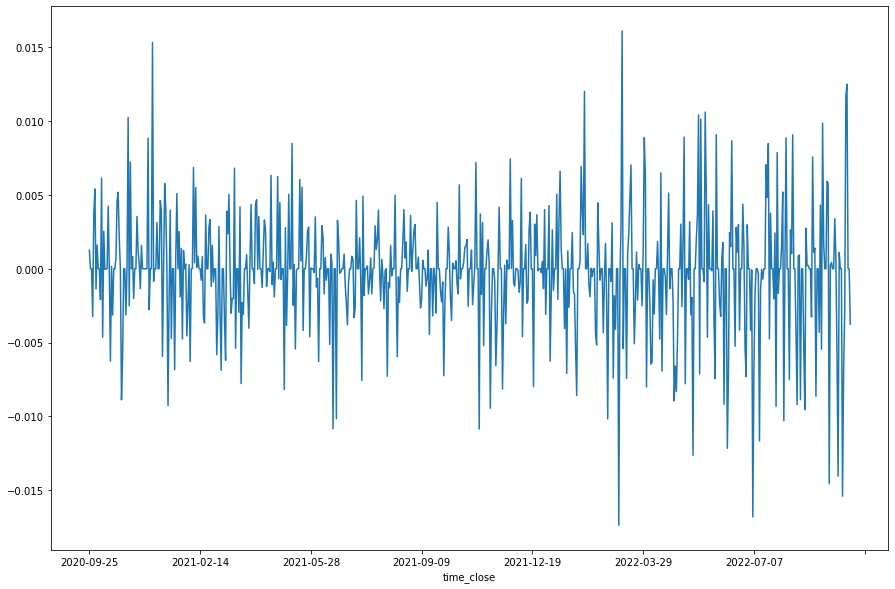

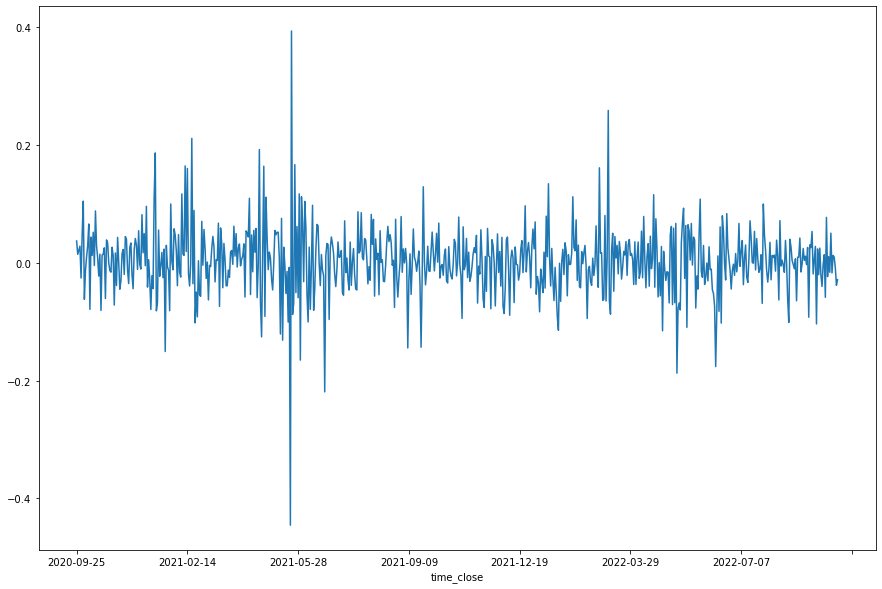

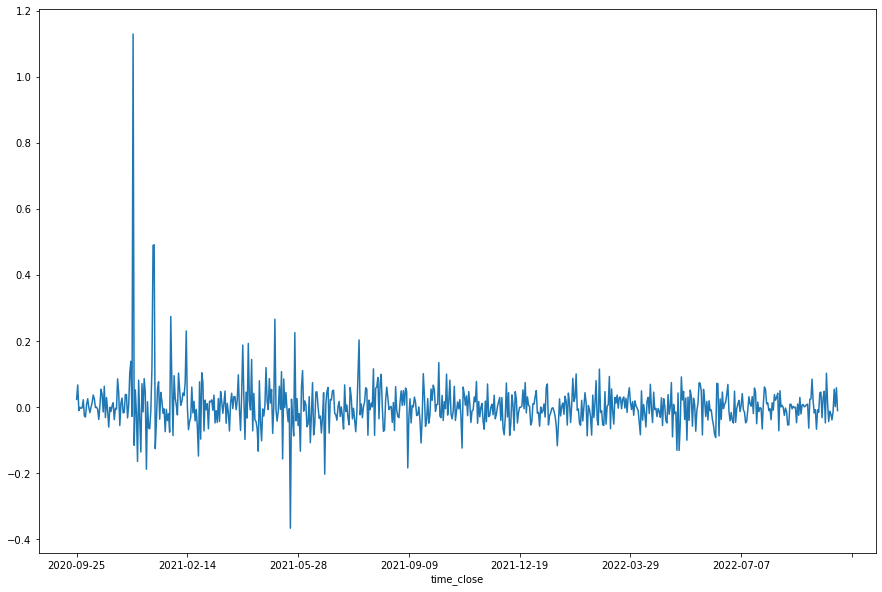

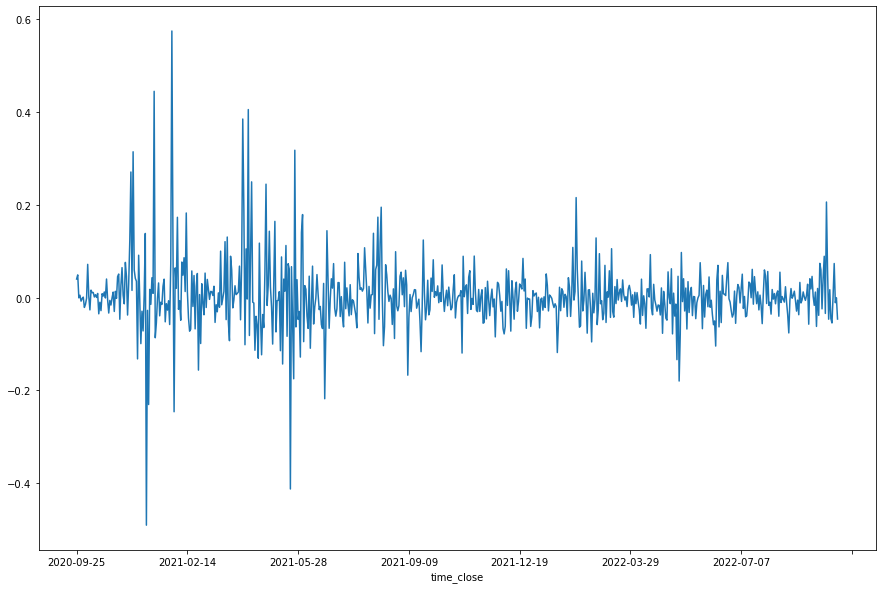

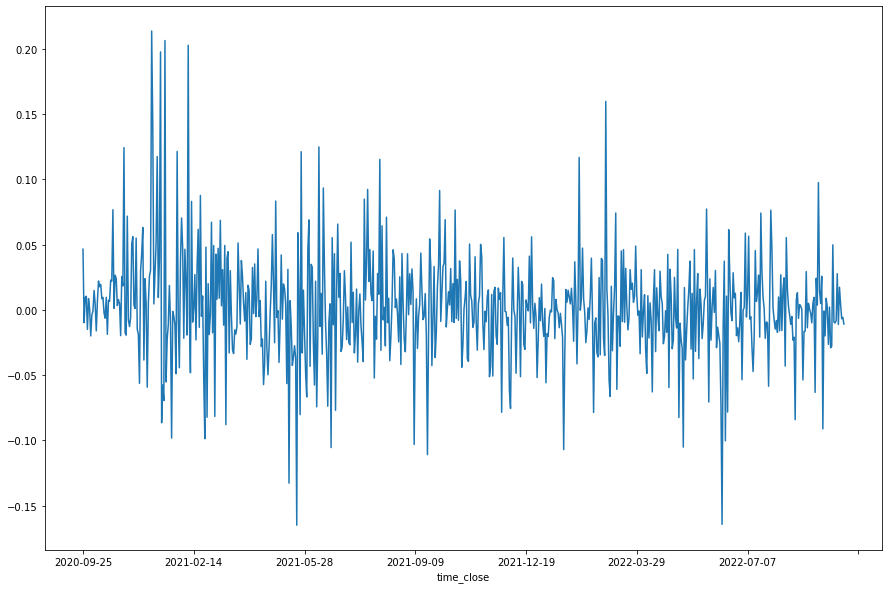

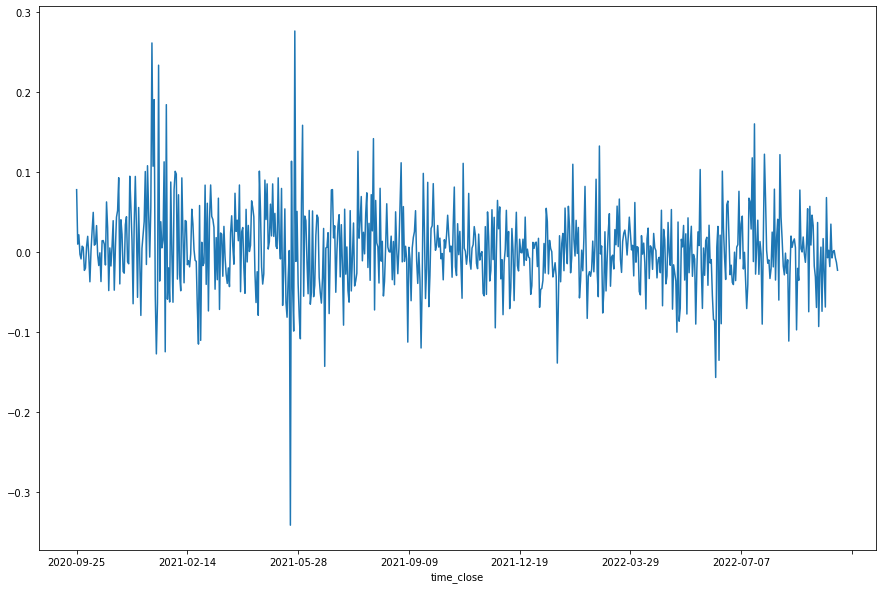

In [19]:
from statsmodels.tsa.stattools import adfuller
List=['close','volume','SPY', 'VIX', 'Treasury', 'Gold', 'Oil', 'EUR_USD','XMR_close','XLM_close', 'XRP_close', 'BTC_close', 'ETH_close']
for i in List:
    timeseries = dfcoin[i].dropna()
    result = adfuller(timeseries)
    plt.figure(figsize=(15, 10))
    ax = timeseries.plot(secondary_y=False, logy=False)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')



# Linear Regression
    1. close(return) with 'yesterday_close_price'(testerday return),'volumn', 'XMR_close', 'XLM_close', 'XRP_close', 'BTC_close', 'ETH_close'
    
    
  

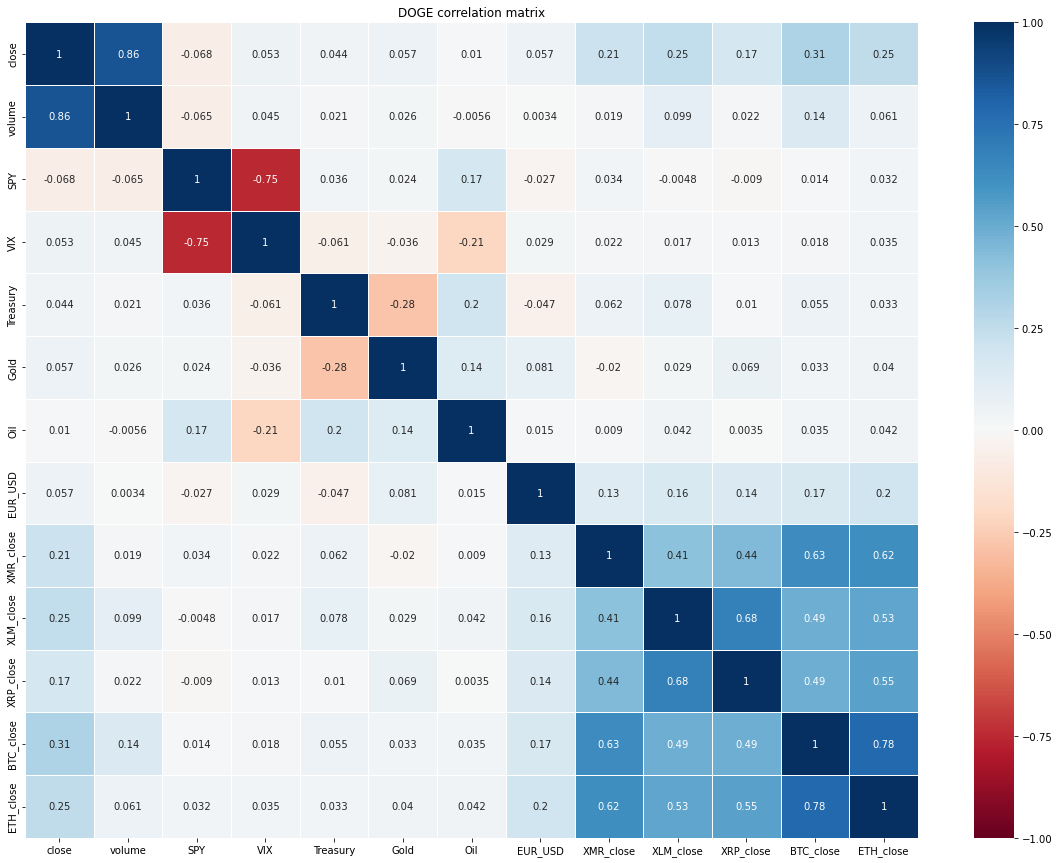

In [18]:
#correlation plot
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dfcoin.corr()
sns.heatmap(corrmat,cmap="RdBu",linewidths=.5,  vmin=-1, vmax=1, annot=True)
plt.title('DOGE correlation matrix')
plt.show()

# Linear Regression with Time Series


In [28]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

dfcoin['yesterday_close_price'] = dfcoin['close'].shift(-1)
dfcoin.drop(dfcoin.tail(1).index, inplace=True) 

X = dfcoin[['yesterday_close_price','close','volume','XMR_close', 'XLM_close', 'XRP_close', 'BTC_close', 'ETH_close']]
y = X.pop('close')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=4, shuffle=False)
X_train

,yesterday_close_price,volume,XMR_close,XLM_close,XRP_close,BTC_close,ETH_close
time_close,,,,,,,
2020-09-25,0.027243,0.321112,0.037234,0.023188,0.040102,0.046477,0.078154
2020-09-26,0.007860,0.104786,0.014505,0.066801,0.049036,-0.009782,0.010122
2020-09-27,0.005012,-0.143173,0.021696,-0.010805,-0.000456,0.009511,0.021704
2020-09-28,-0.022978,-0.262577,0.028372,-0.000851,0.005170,0.010435,-0.002503
2020-09-29,-0.000445,0.318528,-0.025720,-0.003863,-0.007553,-0.014901,-0.008407
...,...,...,...,...,...,...,...
2022-05-11,-0.193128,-0.041563,-0.077940,0.042521,0.046013,0.017071,0.037744
2022-05-12,-0.031191,0.754758,-0.068081,-0.131345,-0.179851,-0.038313,-0.086250
2022-05-13,0.050551,-0.010152,-0.079952,-0.050068,-0.079285,-0.015946,-0.069843


In [29]:
y_train

time_close
2020-09-25    0.021075
2020-09-26    0.027243
2020-09-27    0.007860
2020-09-28    0.005012
2020-09-29   -0.022978
                ...   
2022-05-11    0.042335
2022-05-12   -0.193128
2022-05-13   -0.031191
2022-05-14    0.050551
2022-05-15   -0.011703
Name: close, Length: 548, dtype: float64

In [30]:
#Scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
scaler = StandardScaler()
X5 = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X5
X6 = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X6

,yesterday_close_price,volume,XMR_close,XLM_close,XRP_close,BTC_close,ETH_close
0,-0.175089,-0.182495,1.498197,0.527564,0.458592,0.811418,0.535780
1,-0.017601,-0.125143,-0.487724,-0.510487,-0.416000,-0.772145,-0.741178
2,-0.374105,-0.132677,1.006594,0.285387,0.205461,0.229749,0.340543
3,0.057071,-0.093855,-1.869310,-1.276965,-0.905756,-1.308397,-1.535577
4,-0.212048,-0.093510,1.030409,0.317379,0.378838,1.017927,0.713612
...,...,...,...,...,...,...,...
132,-0.054118,-0.277384,-0.311499,-0.208084,0.160551,-0.260128,-0.425038
133,-0.123244,-0.143631,0.792294,-0.302795,-0.624810,0.584473,0.566770
134,-0.087945,-0.093816,-0.330937,-0.525618,-0.741360,-0.328895,-0.224457
135,-0.060756,-0.155963,0.161787,-0.228027,0.002665,0.340873,-0.073363


Coefficient of determination: 0.62
              Actual  Predicted
time_close                     
2022-05-16  0.027261   0.035222
2022-05-17 -0.023657  -0.043377
2022-05-18  0.012213   0.024585
2022-05-19 -0.068986  -0.096023
2022-05-20  0.029221   0.043586
...              ...        ...
2022-09-26 -0.030910  -0.055566
2022-09-27  0.003896   0.013880
2022-09-28 -0.011849  -0.023130
2022-09-29 -0.003809  -0.013282
2022-09-30  0.002384  -0.001476

[137 rows x 2 columns]


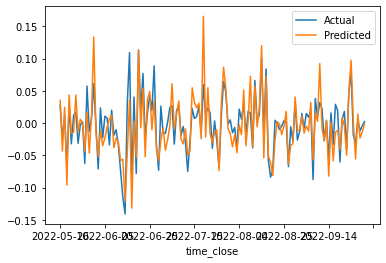

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = regressor.fit(X5, y_train)
y_pred2=regressor.predict(X6)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred2))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred2.squeeze()})
print(df_preds2)

ax = df_preds2.plot()

#Divide into train and test data
from sklearn.model_selection import train_test_split
dfDOGE.drop('tomorrow_change', axis=1, inplace=True)
X = dfDOGE.copy()
y = X.pop('Dummy_label')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, shuffle=False)# Additional supervised model

The supervised spectrum of machine learning model is really wide. With tree-based methods we observed those that are among the best performing but we barely scratched the surface in terms of possibilities and number of modeling.

